Mounted at /content/gdrive
Media= 3378.590267299537
Desvio padrao= 597.5003367548675
Maximo= 5171.091277564139
Media= 3378.590267299537
Minimo= 1586.0892570349347


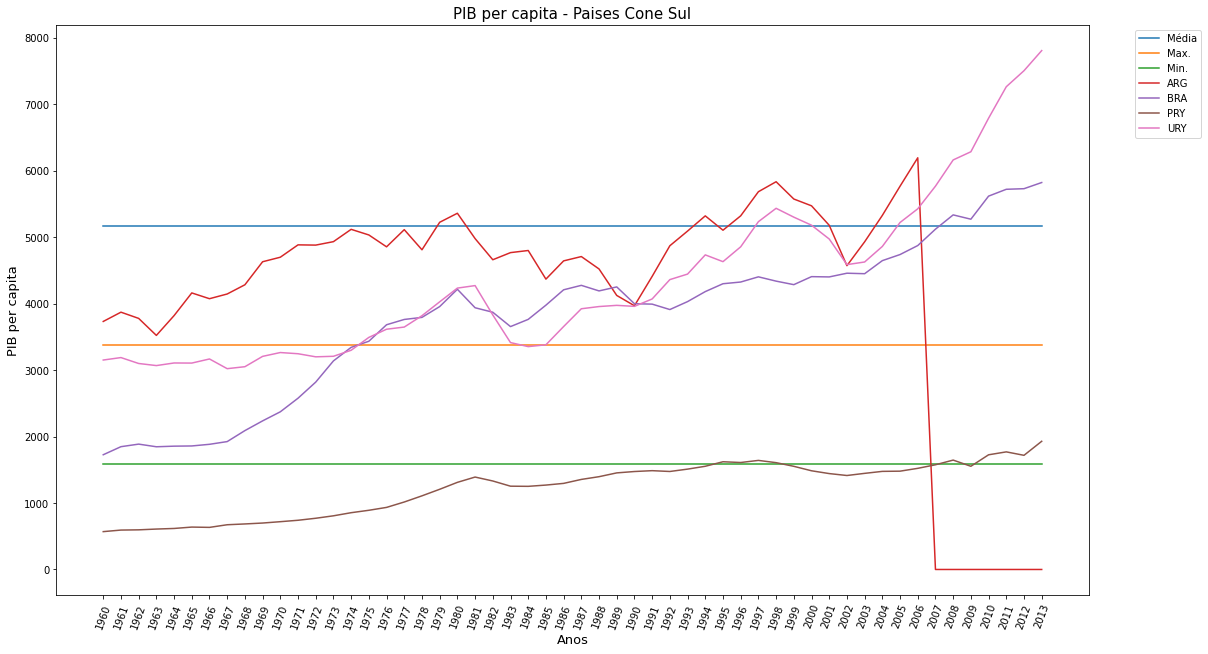

In [1]:
from google.colab import drive 
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

drive.mount('/content/gdrive')

caminho='gdrive/MyDrive/ufsm/aulas/introducao_ciencia_analise_dados_2022_1/aulas_21_24/'
#caminho='./'

nome='gfdd_gdp_paises_cone_sul.csv'

nomecaminho=caminho+nome

# le o dataset cujo nome esta definido na variavel 'nomecaminho'
gfdd_gdp_paises_cone_sul = pd.read_csv(nomecaminho, sep=';', decimal=',')

#print(gfdd_gdp_paises_cone_sul)

nomes_colunas=list(gfdd_gdp_paises_cone_sul.columns)
#print(nomes_colunas,'\n')

nomes_colunas.remove('Country Name')
nomes_colunas.remove('Country Code')
nomes_colunas[0]='medida'
#print(nomes_colunas,'\n')

analise_paises_cone_sul=pd.DataFrame([],columns=nomes_colunas)
#print(analise_paises_cone_sul)

anos=nomes_colunas.copy()
anos.remove('medida')

media_ano = [0] * len(nomes_colunas)
media_ano[0]='media_ano'

num_paises=gfdd_gdp_paises_cone_sul.shape[0]
#print('Numero de paises: ', num_paises )

gfdd_gdp_paises_cone_sul=gfdd_gdp_paises_cone_sul.fillna(0)


cont=1
for ano in anos:
    coluna=gfdd_gdp_paises_cone_sul[ano].to_numpy()
    coluna_float = [float(x) for x in coluna]
    media_ano[cont]=stat.mean(coluna_float)
    cont=cont+1
    
#print(media_ano)
tam=len(analise_paises_cone_sul)

analise_paises_cone_sul.loc[tam]=media_ano

#print(analise_paises_america_sul)

media_anos_temp=media_ano.copy()
media_anos_temp.remove('media_ano')

media_anos=stat.mean(media_anos_temp)
desvio_padrao_anos=stat.stdev(media_anos_temp)
delta=3*desvio_padrao_anos
maximo=media_anos+delta
minimo=media_anos-delta

print('Media=',media_anos)
print('Desvio padrao=',desvio_padrao_anos)
print('Maximo=',maximo)
print('Media=',media_anos)
print('Minimo=',minimo)

#print(anos)
num_anos=len(anos)
#print(num_anos)
#print(num_paises)
x=anos

y_max=[maximo]*num_anos
y_media=[media_anos]*num_anos
y_min=[minimo]*num_anos

plt.xticks(fontsize=10, rotation=70)
plt.plot(x,y_max,label="Média")
plt.plot(x,y_media,label="Max.")
plt.plot(x,y_min,label="Min.")

#num_paises

for indice, linha in gfdd_gdp_paises_cone_sul.iterrows():
    linha_cont=linha.to_numpy()
    pais=linha_cont[2]
    #print(pais)
    linha_cont
    linha_cont = np.delete(linha_cont, 0)
    linha_cont = np.delete(linha_cont, 0)
    linha_cont = np.delete(linha_cont, 0)
    #print(linha_cont,'tam=',len(linha_cont))
    y_val=[float(x) for x in linha_cont]
    #print(y_val)
    plt.plot(x,y_val,label=pais)
    
fig=plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title("PIB per capita - Paises Cone Sul",fontsize=15)
plt.xlabel("Anos",fontsize=13)
plt.ylabel("PIB per capita",fontsize=13)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('pip_per_capita.png', dpi=300)
plt.show()
